In [77]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.ticker import FuncFormatter
import numpy as np
import random
import json
import os
import re
import seaborn as sns
import math

In [36]:
def read_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='5_5.pcap/', window_size=100):
    res = {}
    res[algo] = []
    for epoch in epochs:
        
        path = f"../SketchPatternQuery/{algo}/{dataset}"\
                f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
        
        for dir in sorted(os.listdir(path)):
            p = os.path.join(path, dir)
            if os.path.isdir(p): 
                window_dir = "window_" + str(window_size)
                full_path = os.path.join(path, dir, window_dir,'total_flow_size.txt')    
                with open(full_path, 'r') as f:
                    for val in f:
                        res[algo].append(int(val))
            
    return res

# read_data()

In [95]:
def plot_flow_size_accumulate(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset=['10_0.pcap/', '5_5.pcap/', '4_6.pcap/', '3_7.pcap/'], window_size=100):
    
    res = []
    for d in dataset:
        res.append(read_data(algo, row, width, level, seed, count, flowkey, epochs, d, window_size)[algo])

    plt.figure(figsize=(12, 4))
    
    for i in range(len(dataset)):
        sns.lineplot(data=res[i], dashes=False, markers=True, label=dataset[i][:-1])
    # for i, data_set in enumerate(res):
        # plt.plot(range(1,21), data_set, label=f'Data Set {i + 1}')
        
    
    # Add labels and legend
    plt.xlabel('Time (sec)')
    plt.ylabel('Value')
    plt.title('Flow Size Accumulate (Window Size = %d)' % (window_size))
    # plt.axhline(10000, c="black")
    # plt.xticks([i for i in range(int(10*1000/window_size) + 1)])
    ticks = [i for i in range(int(10*1000/window_size) + 1)]
    adjusted_ticks = [tick * (window_size / 1000) for tick in ticks[0::int(1000 / window_size)]]
    plt.xticks(ticks[0::int(1000/window_size)], adjusted_ticks)
    plt.legend(loc='upper left', ncol=math.ceil(len(res)/4))

    # Show the plot
    plt.show()
    
# plot_flow_size_accumulate()

In [116]:
def plot_flow_size_variation(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset=['10_0.pcap/', '5_5.pcap/', '4_6.pcap/', '3_7.pcap/'], window_size=100):
    
    res = []
    for d in dataset:
        res.append(read_data(algo, row, width, level, seed, count, flowkey, epochs, d, window_size)[algo])
        
    vars = []
    for r in res:
        var = [None]
        for i in range(1,len(r)):
            var.append(r[i] - r[i-1])
        vars.append(var)

        print(var)

    plt.figure(figsize=(12, 4))
    
    for i in range(len(dataset)):
        sns.lineplot(data=vars[i], dashes=False, markers=True, label=dataset[i][:-1])
    # for i, data_set in enumerate(res):
        # plt.plot(range(1,21), data_set, label=f'Data Set {i + 1}')
        

    # Add labels and legend
    plt.xlabel('Time (sec)')
    plt.ylabel('Value')
    plt.title('Flow Size Variation (Window Size = %d)' % (window_size))
    # plt.axhline(10000, c="black")
    # plt.xticks([i for i in range(1, int(10*1000/window_size) + 1)])
    ticks = [i for i in range(int(10*1000/window_size) + 1)]
    print(ticks)
    adjusted_ticks = [tick * (window_size / 1000) for tick in ticks[0::int(1000 / window_size)]]
    print(adjusted_ticks)
    plt.xticks(ticks[0::int(1000/window_size)], adjusted_ticks)
    plt.legend(loc='lower left', ncol=math.ceil(len(res)/4))

    # Show the plot
    plt.show()
    
# plot_flow_size_variation()

### Common Variable

In [55]:
algo='cm'
row=3
width=4096
level=1
seed=1
count=1
flowkey='srcIP' 
epochs=['10']
dataset=['10_0.pcap/', '5_5.pcap/', '4_6.pcap/', '3_7.pcap/']

window_size = [100, 200, 500]

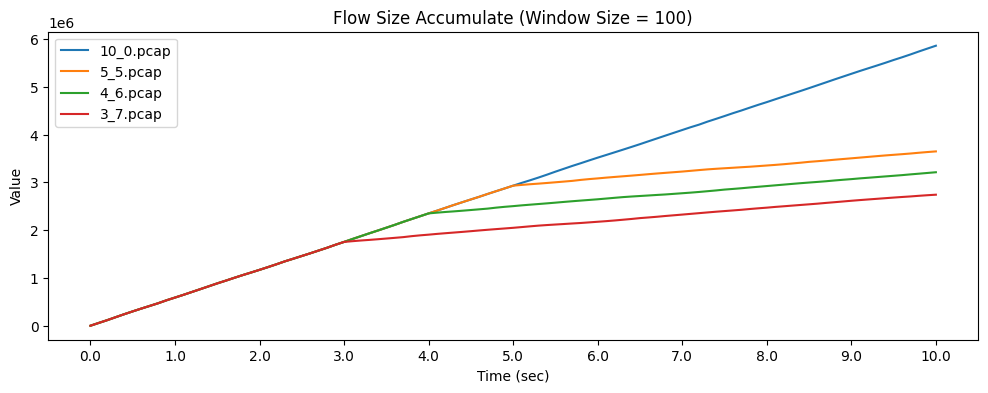

[None, 59016, 58167, 62221, 61602, 59045, 57499, 55884, 56234, 62427, 56750, 57160, 59645, 59565, 59970, 60398, 56584, 58856, 57317, 54455, 56025, 57321, 59051, 61537, 55305, 56416, 56257, 58452, 58282, 63108, 58426, 61276, 59685, 59623, 57946, 59256, 59485, 62786, 58996, 58614, 59079, 57494, 59760, 59823, 57565, 57108, 56480, 59727, 57363, 57116, 57698, 57460, 54990, 57371, 60346, 62833, 60029, 60113, 56598, 58836, 57607, 55328, 55936, 56213, 56786, 57620, 59960, 59090, 59384, 58978, 58738, 58493, 54510, 63245, 57197, 58363, 60186, 56401, 60131, 58974, 56110, 58979, 58506, 57995, 57762, 59046, 60272, 60304, 60705, 59005, 59212, 58967, 56460, 56484, 57403, 59981, 56690, 59510, 62526, 60050, 59675]
[None, 59016, 58167, 62221, 61602, 59045, 57499, 55884, 56234, 62427, 56750, 57160, 59645, 59565, 59970, 60398, 56584, 58856, 57317, 54455, 56025, 57321, 59051, 61537, 55305, 56416, 56257, 58452, 58282, 63108, 58426, 61276, 59685, 59623, 57946, 59256, 59485, 62786, 58996, 58614, 59079, 57494,

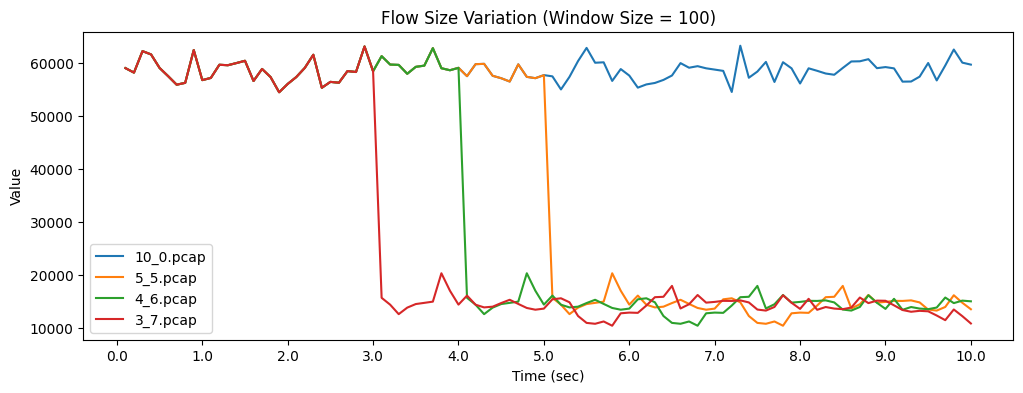

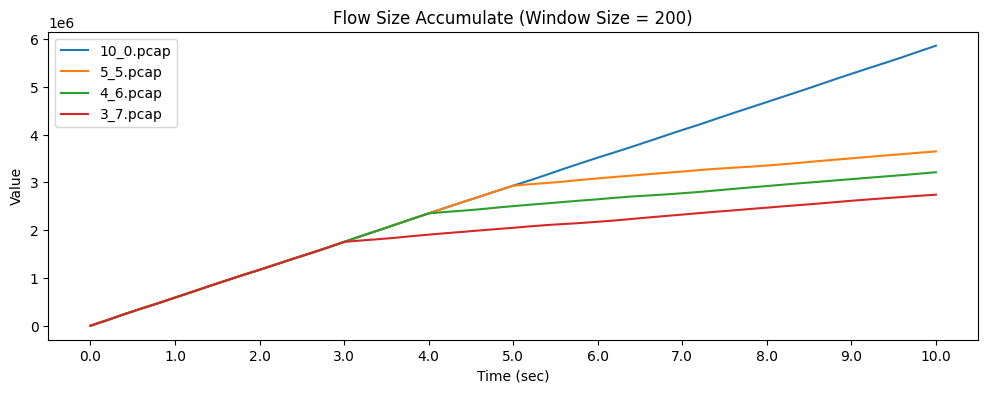

[None, 117182, 123821, 116542, 112119, 119173, 116806, 119537, 116978, 116182, 110480, 116371, 116843, 112673, 116734, 121534, 120961, 117569, 118741, 121782, 117692, 117252, 117385, 113589, 117091, 114816, 112442, 117716, 122866, 116705, 116443, 111264, 113007, 117568, 118481, 117696, 113027, 120429, 118543, 116545, 115083, 117490, 115748, 119324, 121010, 118211, 115414, 113887, 116677, 122043, 119741]
[None, 117182, 123821, 116542, 112119, 119173, 116806, 119537, 116978, 116182, 110480, 116371, 116843, 112673, 116734, 121534, 120961, 117569, 118741, 121782, 117692, 117252, 117385, 113589, 117091, 114793, 29966, 26328, 29132, 35181, 31319, 30365, 27794, 29908, 28180, 26956, 30913, 26995, 21627, 21528, 25537, 26968, 31555, 31505, 30565, 29601, 30122, 29909, 26603, 30018, 28228]
[None, 117182, 123821, 116542, 112119, 119173, 116806, 119537, 116978, 116182, 110480, 116371, 116843, 112673, 116734, 121534, 120961, 117569, 118741, 121782, 117672, 29966, 26328, 29132, 35181, 31319, 30365, 27

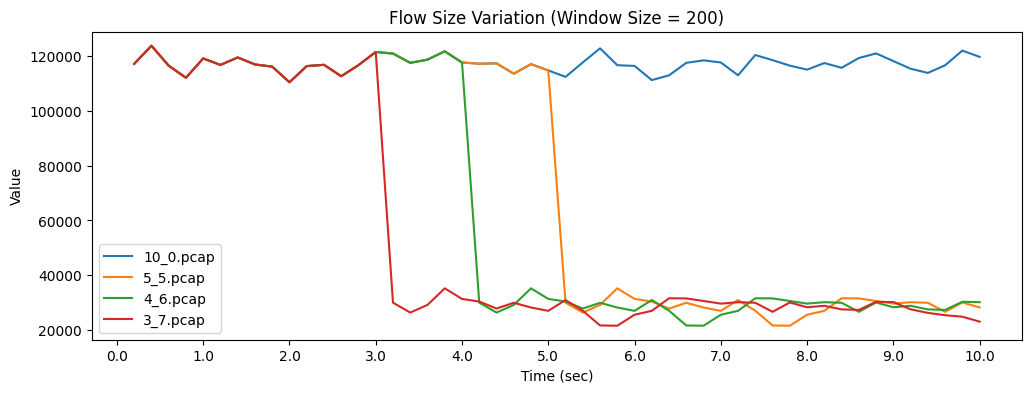

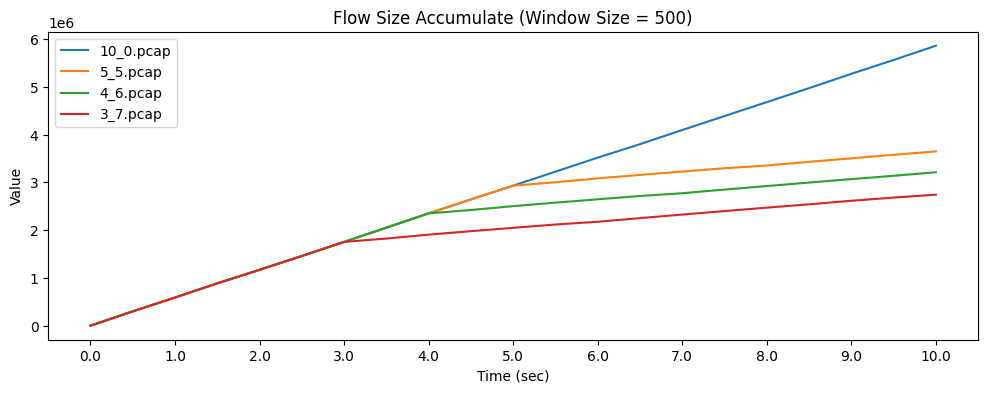

[None, 300047, 288789, 296738, 283239, 289616, 294523, 297772, 298972, 291747, 288383, 292992, 293181, 281878, 296131, 291822, 291811, 292249, 299533, 289273, 298517]
[None, 300047, 288789, 296738, 283239, 289616, 294523, 297772, 298972, 291747, 288382, 70750, 81169, 72800, 70386, 68816, 57793, 76420, 73769, 73425, 71480]
[None, 300047, 288789, 296738, 283239, 289616, 294523, 297772, 298971, 70750, 81169, 72800, 70386, 68816, 57793, 76420, 73769, 73425, 71485, 69743, 74304]
[None, 300047, 288789, 296738, 283239, 289616, 294522, 70750, 81169, 72800, 70386, 68816, 57793, 76420, 73769, 73425, 71485, 69743, 74310, 66812, 60165]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]


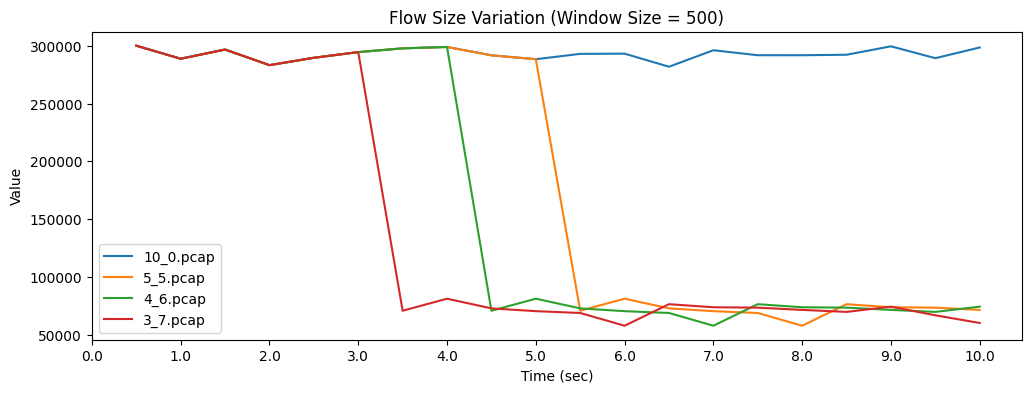

In [117]:
for ws in window_size:
    plot_flow_size_accumulate(algo, row, width, level, seed, count, flowkey, epochs, dataset, ws)
    plot_flow_size_variation(algo, row, width, level, seed, count, flowkey, epochs, dataset, ws)